# Importing important ibraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mt
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
dataSet = pd.read_csv(r"G:\Location recommender with sentiment analysis\notebook\data\TeePublic_review.csv", encoding="latin-1")


In [4]:
print(dataSet.head(10))

   reviewer_id store_location   latitude   longitude  date  month  \
0          0.0             US  37.090240  -95.712891  2023      6   
1          1.0             US  37.090240  -95.712891  2023      6   
2          2.0             US  37.090240  -95.712891  2023      6   
3          3.0             US  37.090240  -95.712891  2023      6   
4          4.0             CA  56.130366 -106.346771  2023      6   
5          5.0             US  37.090240  -95.712891  2023      6   
6          6.0             US  37.090240  -95.712891  2023      6   
7          7.0             US  37.090240  -95.712891  2023      6   
8          8.0             CA  56.130366 -106.346771  2023      6   
9          9.0             US  37.090240  -95.712891  2023      6   

            year                                          title  \
0  2015 00:00:00                     Great help with lost order   
1  2024 00:00:00  I ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2  2017 00:00:00    These guys offer th

In [5]:
dataSet.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


# check for empty and null cell

In [6]:
dataSet.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64

In [7]:
dataSet=dataSet.dropna()

# Desccriptive statistics of the data

In [8]:
print(dataSet.describe())

         reviewer_id       latitude      longitude           date  \
count  247587.000000  247587.000000  247587.000000  247587.000000   
mean   138902.686849      37.210091     -88.254362    2020.890281   
std     80076.904234      10.204186      36.903583       1.386106   
min         0.000000     -40.900557    -172.104629    2018.000000   
25%     69330.500000      37.090240     -95.712891    2020.000000   
50%    139217.000000      37.090240     -95.712891    2021.000000   
75%    207521.500000      37.090240     -95.712891    2022.000000   
max    278098.000000      64.963051     174.885971    2023.000000   

               month   review-label  
count  247587.000000  247587.000000  
mean        7.221966       4.379612  
std         3.682415       1.197636  
min         1.000000       1.000000  
25%         4.000000       4.000000  
50%         7.000000       5.000000  
75%        11.000000       5.000000  
max        12.000000       5.000000  


# Performing Exploratory Data Analysis (EDA)

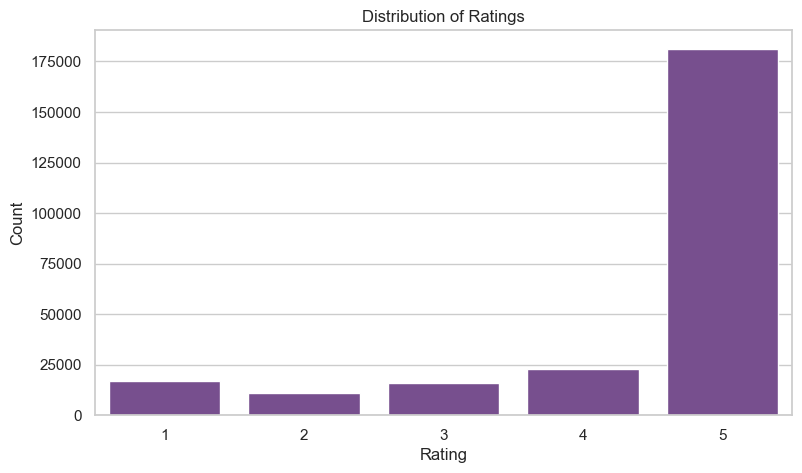

In [9]:
# Plotting the distribution of ratings
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=dataSet, x='review-label',color='#7a4499')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#  Insights
In General It can be stated that the T-shirt Rating is impressive as almost all the Rating is five. So, let us have a look at the distribution of Rating by year.

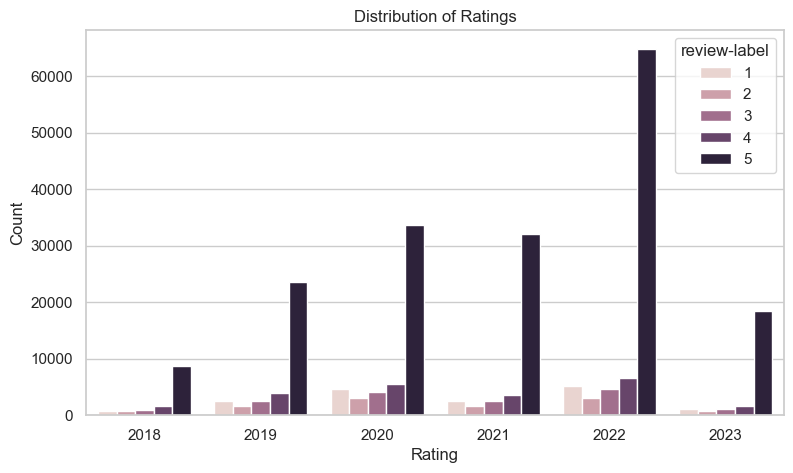

In [10]:
# Plotting the distribution of ratings by year
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=dataSet, x='date',hue='review-label')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Insights
looking at the visual we see that the rating distribution each year looks the same. Now let us check for the length of Review. Perhaps we might see something interesting about it, we will do that by just adding Review lenghth column to our dataSet then visualize it.

# Distribution of length of Reviews Lengths

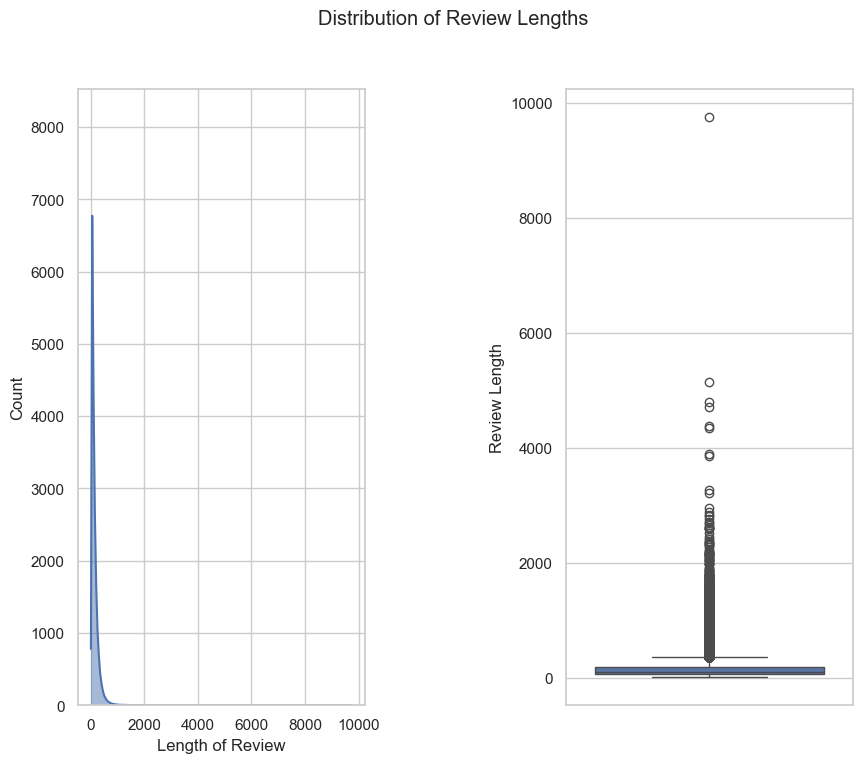

In [11]:
# Calculating the length of each review
dataSet['Review Length'] = dataSet['review'].apply(str).apply(len)
# Plotting the distribution of review lengths
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
sns.histplot(dataSet['Review Length'],kde=True)
plt.xlabel('Length of Review')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(dataSet['Review Length'])
plt.subplots_adjust(wspace=0.7)
plt.ylabel('Review Length')
plt.suptitle('Distribution of Review Lengths') 
plt.show()

# Creating function that evaluate the Sentiment

In [12]:
from textblob import TextBlob
def sentiment_Evaluation(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [13]:
dataSet['Sentiments']=dataSet['review'].apply(sentiment_Evaluation)

In [19]:
import pickle

In [20]:
with open('dataSet.pkl', 'wb') as f:
  pickle.dump(dataSet, f)

In [14]:
dataSet.head(10)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label,Review Length,Sentiments
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5,196,Positive
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5,235,Positive
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5,161,Positive
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5,191,Positive
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4,314,Positive
5,5.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Always top notch,Always top notch customer service. Never have ...,5,154,Positive
6,6.0,US,37.090240,-95.712891,2023,6,2019 00:00:00,Recent review,I have messaged sellers and get no response at...,4,242,Positive
7,7.0,US,37.090240,-95.712891,2023,6,2023 00:00:00,Great communication,Great communication. They let me know it was a...,5,214,Positive
8,8.0,CA,56.130366,-106.346771,2023,6,2021 00:00:00,Awesome,"Very impressed with the quality, I had a hard ...",5,186,Positive
9,9.0,US,37.090240,-95.712891,2023,6,2014 00:00:00,Wonderful quality T-shirts for anï¿½ï¿½ï¿½,Wonderful quality T-shirts for an amazing pric...,5,185,Positive


In [15]:
dataSet['review'][13]

'Customer service was first rate but the sizes are really off. I normally order a medium, and the shirt I received would have fit a 10 year old. I exchanged for an XL, and itï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s still a little small'

# Creating Chart showing the distribution of the Sentiment

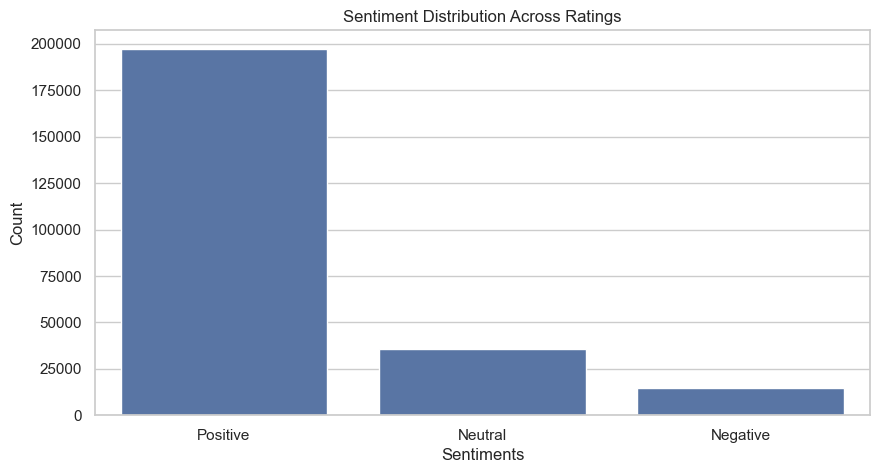

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataSet, x='Sentiments')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

# Distribution of Sentiment By Year

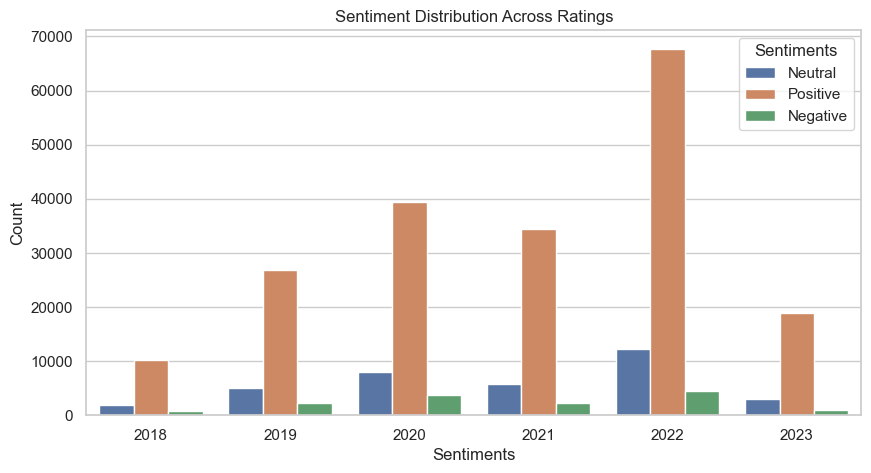

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataSet, x='date', hue='Sentiments')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

# Insights
As we can see above most of the reviews have positive sentiment. Now let us see distribution across the rating may be here is relationship.

# Exploring the relationship between the sentiments and the ratings

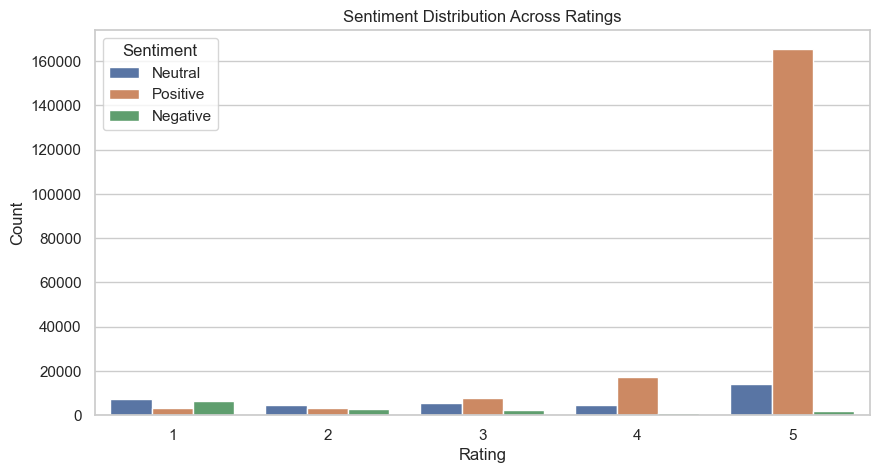

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataSet, x='review-label', hue='Sentiments')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

# Insights
there seems to be relationship between the rating and the sentiment. Yes the proportion of positive sentiment increase as the rating increase while the proportion decrease as the rating increase. Now let us analyse the text review using word cloud

# mapping the sentiments with location


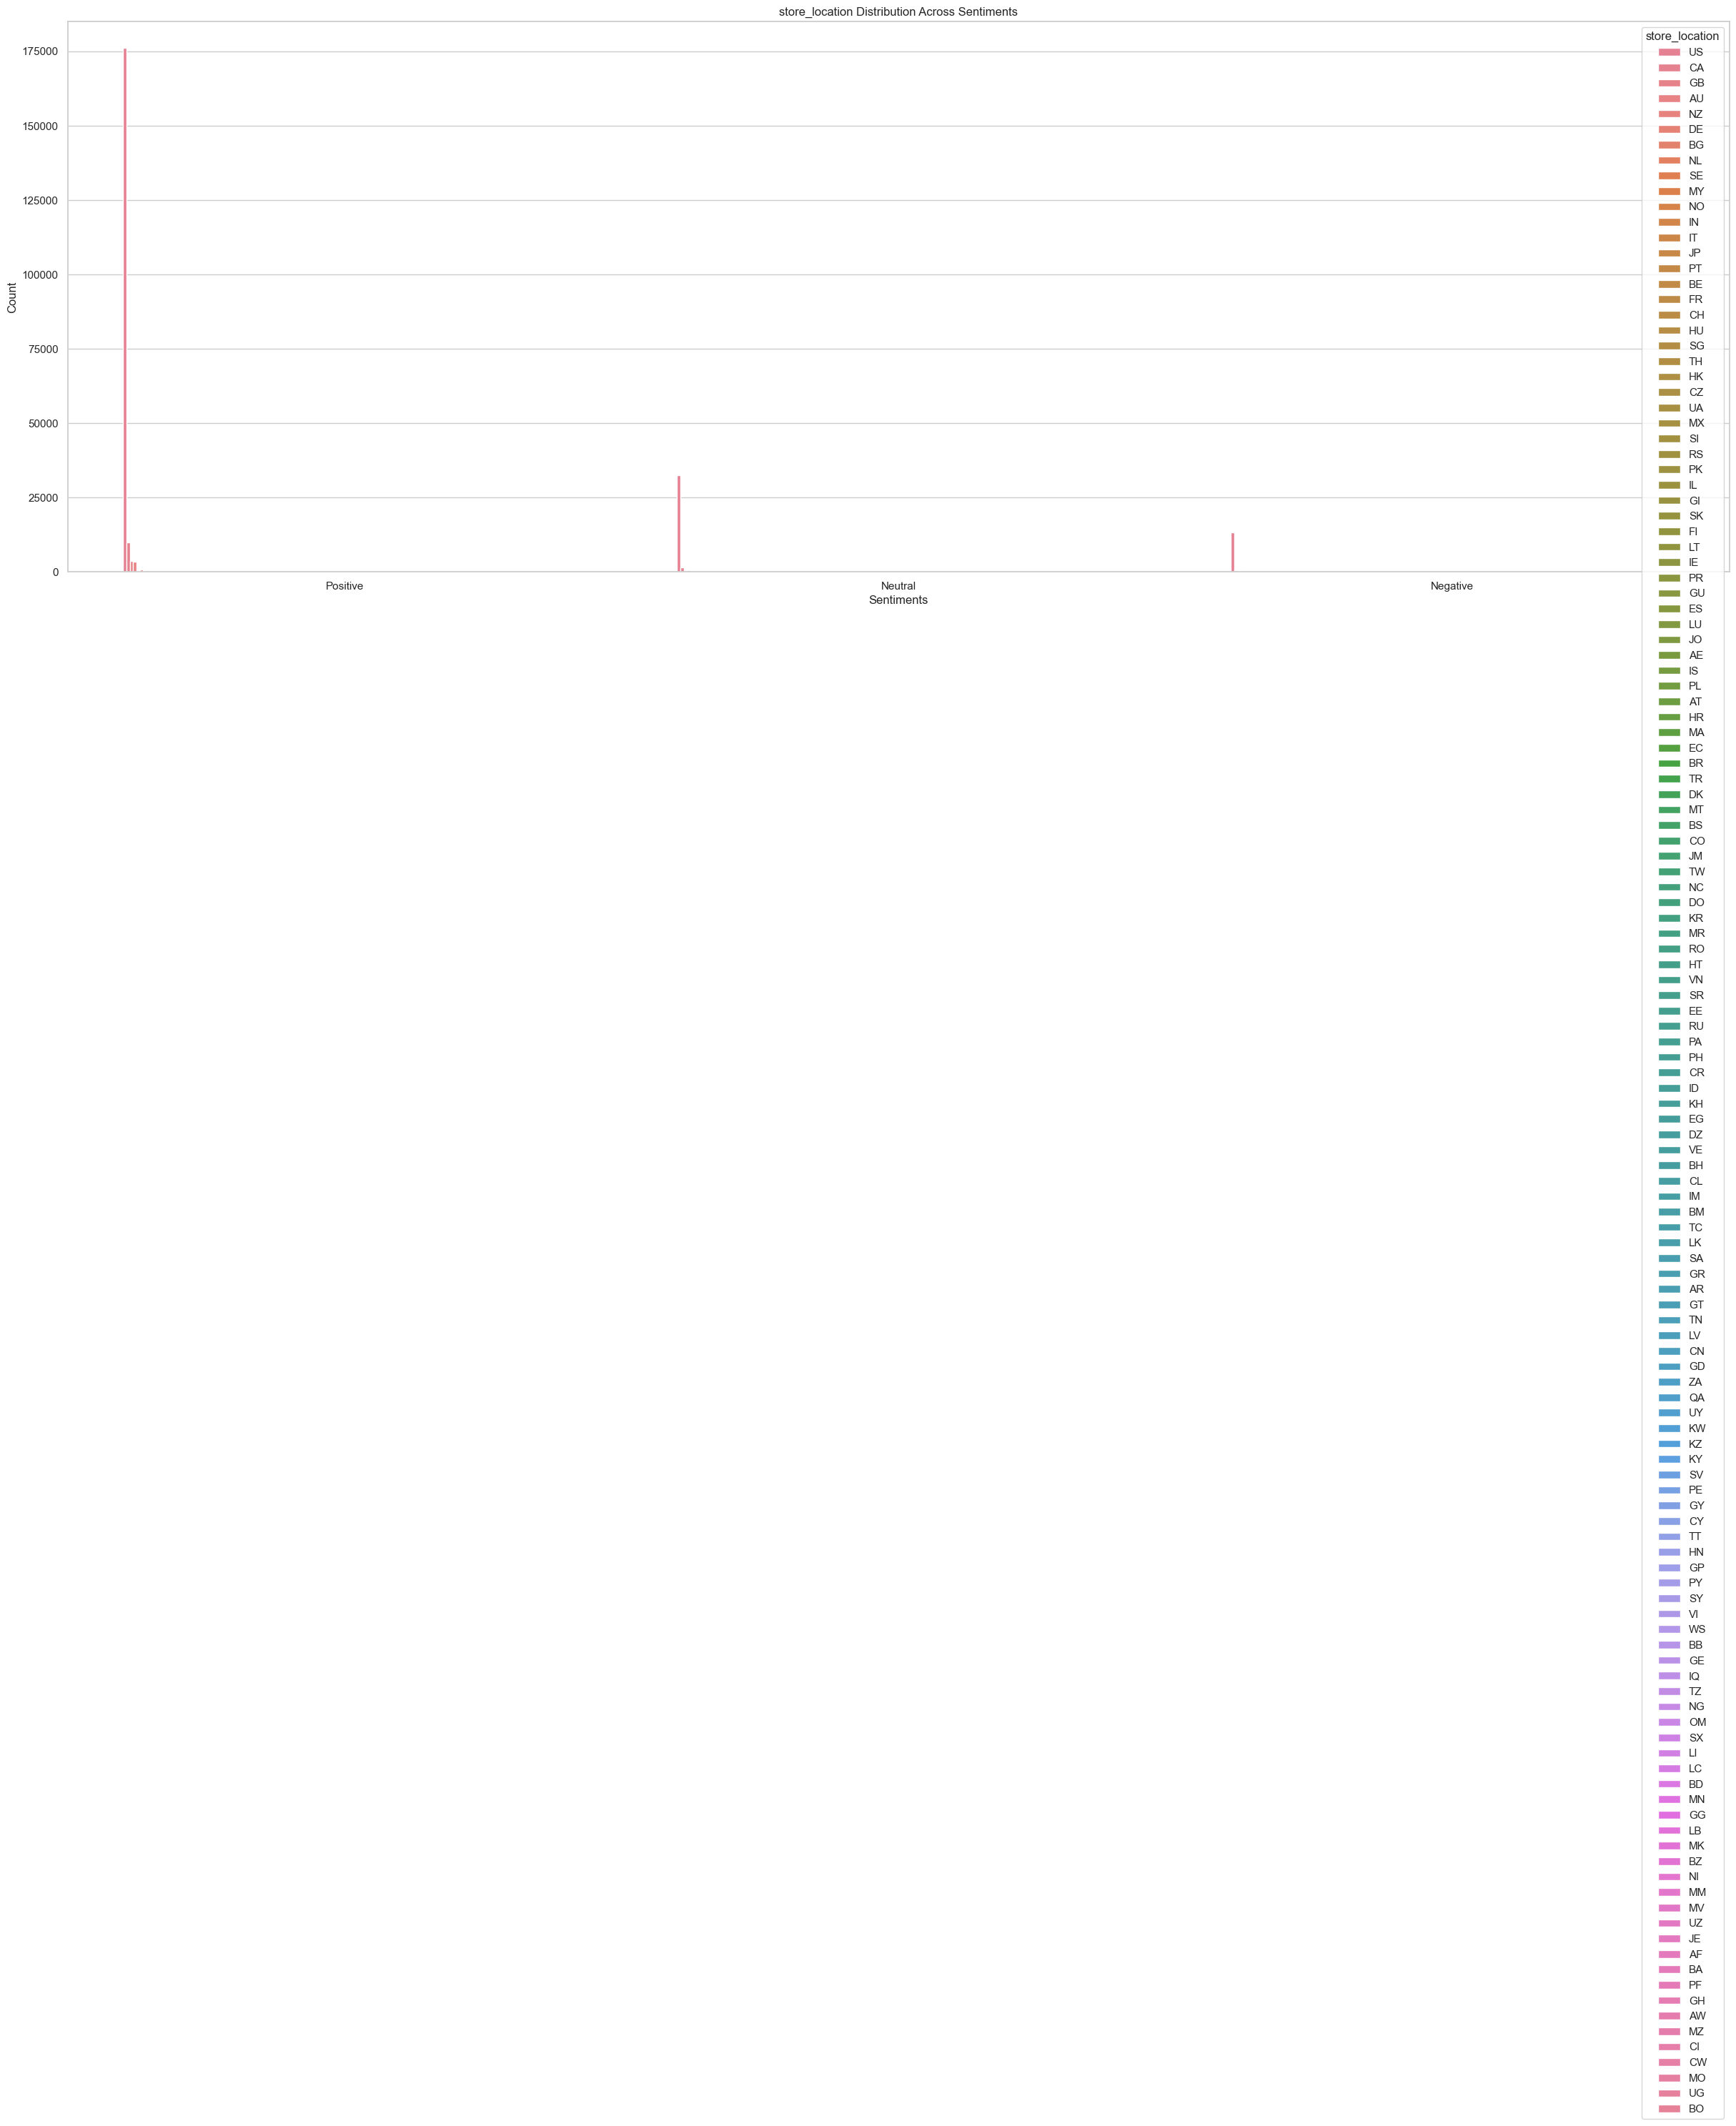

In [19]:
plt.figure(figsize=(30, 10))
sns.countplot(data=dataSet, x='Sentiments', hue='store_location')
plt.title('store_location Distribution Across Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

In [20]:
dataSet.head(10)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label,Review Length,Sentiments
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5,196,Positive
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5,235,Positive
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5,161,Positive
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5,191,Positive
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4,314,Positive
5,5.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Always top notch,Always top notch customer service. Never have ...,5,154,Positive
6,6.0,US,37.090240,-95.712891,2023,6,2019 00:00:00,Recent review,I have messaged sellers and get no response at...,4,242,Positive
7,7.0,US,37.090240,-95.712891,2023,6,2023 00:00:00,Great communication,Great communication. They let me know it was a...,5,214,Positive
8,8.0,CA,56.130366,-106.346771,2023,6,2021 00:00:00,Awesome,"Very impressed with the quality, I had a hard ...",5,186,Positive
9,9.0,US,37.090240,-95.712891,2023,6,2014 00:00:00,Wonderful quality T-shirts for anï¿½ï¿½ï¿½,Wonderful quality T-shirts for an amazing pric...,5,185,Positive


In [ ]:
import plotly.io as pio
import pandas as pd
import plotly.express as px

# Set the renderer to 'notebook'
pio.renderers.default = 'notebook'

# Read the CSV file
import pickle

# Read the pickled DataFrame from the file
with open(r'G:\Location recommender with sentiment analysis\notebook\data\dataSet.pkl', 'rb') as f:
    dataSet = pickle.load(f)


# Use valid column names from the DataFrame
fig = px.scatter_mapbox(dataSet,
                        lat="latitude",
                        lon="longitude",
                        hover_name="Sentiments",
                        color="store_location",
                        color_continuous_scale=px.colors.sequential.RdBu,
                        zoom=10)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
